In [1]:
import numpy as np 
# le package fondamental pour le calcul de tableaux
#Il a également des fonctions pour travailler dans le domaine de l'algèbre linéaire


import pandas as pd 
# permettant la manipulation et l'analyse des données.


import seaborn as sns
# bibliothèque de visualisation de données basée sur matplotlib.
# Il fournit une interface de haut niveau pour dessiner des statistiques attrayantes et informatives.


import matplotlib.pyplot as plt
%matplotlib inline 
#Pour Jupyter notebook
# bibliothèque complète pour créer des visualisations statiques, animées et interactives.


from sklearn.model_selection import train_test_split
#Divisez des tableaux ou des matrices en sous-ensembles d'entraînement et de test.


from sklearn.preprocessing import StandardScaler
# fournit plusieurs fonctions pour transformer les vecteurs de caractéristiques.
# Nous en avons besoin pour la Standardisation


from functools import partial
# pour les fonctions d'ordre supérieur
# Renvoie un nouvel objet partiel


import tensorflow as tf
# Est une bibliothèque logicielle open source pour le calcul numérique haute performance.
# Développé à l'origine par des chercheurs et des ingénieurs 
# de l'équipe Google Brain au sein de l'organisation AI de Google


import tensorflow_probability as tfp
# Est une bibliothèque pour le raisonnement probabiliste et l'analyse statistique.
# permet l'intégration de méthodes probabilistes avec des réseaux profonds.

# from thermo.bnn import build_net, chunks, target_log_prob_fn_factory

from sklearn.metrics import r2_score
# implémente plusieurs fonctions de perte, de score et d'utilité pour mesurer les performances.
# Nous en avons besoin pour le calcul de R^2

In [2]:
voitures = pd.read_excel('Audinew.xlsx')
voitures.shape

(1827, 16)

In [3]:
voitures = voitures.drop_duplicates()
print('Shape After deleting duplicate values:', voitures.shape)

Shape After deleting duplicate values: (1822, 16)


In [4]:
voitures.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

In [5]:
voitures.isnull().sum()

Year               0
Name               0
price              0
Age                0
Miles              0
Exterior color     0
Interior color     0
NB-accidents       0
NB-Owners          0
Type of use        0
MPG:CTY            0
MPG:HWY            0
Engine:capacity    0
Engine:Type        0
 Transmission      0
Driven Type        0
dtype: int64

In [6]:
voitures.columns

Index(['Year', 'Name', 'price', 'Age', 'Miles', 'Exterior color',
       'Interior color', 'NB-accidents', 'NB-Owners', 'Type of use', 'MPG:CTY',
       'MPG:HWY', 'Engine:capacity', 'Engine:Type', ' Transmission',
       'Driven Type'],
      dtype='object')

In [7]:
voitures.drop(['Year'],axis=1,inplace=True)
voitures.drop([' Transmission'],axis=1,inplace=True)
voitures.drop(['Exterior color'],axis=1,inplace=True)
voitures.drop(['Interior color'],axis=1,inplace=True)
voitures.drop(['Type of use'],axis=1,inplace=True)
voitures.drop(['NB-accidents'],axis=1,inplace=True)

In [8]:
voitures['price'] = voitures['price'] / 10000

In [9]:

DataForML=pd.get_dummies(voitures,drop_first=True)

DataForML.head()

,price,Age,Miles,NB-Owners,MPG:CTY,MPG:HWY,Engine:capacity,Name_Audi Q5,Name_Audi Q7,Name_Audi Q8,...,Name_Audi SQ7,Name_Audi SQ8,Engine:Type_V-6 Diesel Turbocharged,Engine:Type_V-6 Gas,Engine:Type_V-6 Gas Supercharged,Engine:Type_V-6 Gas Turbocharged,Engine:Type_V-8 Gas,Engine:Type_V-8 Gas Turbocharged,Engine:Type_V-8 Hybrid Turbocharged,Driven Type_ FWD
0,2.8900,4,29390,1,20,28,2.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2.9999,5,70439,2,19,25,3.0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,4.0890,3,26616,1,19,25,2.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,3.0998,3,61183,2,22,27,2.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.4500,4,46218,2,20,28,2.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [10]:
DataForML.columns

Index(['price', 'Age', 'Miles', 'NB-Owners', 'MPG:CTY', 'MPG:HWY',
       'Engine:capacity', 'Name_Audi Q5', 'Name_Audi Q7', 'Name_Audi Q8',
       'Name_Audi RS Q8', 'Name_Audi SQ5', 'Name_Audi SQ7', 'Name_Audi SQ8',
       'Engine:Type_V-6 Diesel Turbocharged', 'Engine:Type_V-6 Gas',
       'Engine:Type_V-6 Gas Supercharged', 'Engine:Type_V-6 Gas Turbocharged',
       'Engine:Type_V-8 Gas', 'Engine:Type_V-8 Gas Turbocharged',
       'Engine:Type_V-8 Hybrid Turbocharged', 'Driven Type_ FWD'],
      dtype='object')

In [11]:
X = DataForML[['Age', 'Miles', 'NB-Owners', 'MPG:CTY', 'MPG:HWY',
       'Engine:capacity', 'Name_Audi Q5', 'Name_Audi Q7', 'Name_Audi Q8',
       'Name_Audi RS Q8', 'Name_Audi SQ5', 'Name_Audi SQ7', 'Name_Audi SQ8',
       'Engine:Type_V-6 Diesel Turbocharged', 'Engine:Type_V-6 Gas',
       'Engine:Type_V-6 Gas Supercharged', 'Engine:Type_V-6 Gas Turbocharged',
       'Engine:Type_V-8 Gas', 'Engine:Type_V-8 Gas Turbocharged',
       'Engine:Type_V-8 Hybrid Turbocharged', 'Driven Type_ FWD']]
y = DataForML['price']

In [12]:
#séparer l'entraînement et le test 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=100)

In [13]:
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (1638, 21)
x test:  (182, 21)
y train:  (1638,)
y test:  (182,)


In [14]:
# standardisation (normalisation z-score)
# s'adapter et se transformer sur les données d'entraînement, s'adapter uniquement sur le test

s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype("float32"))
X_test = s_scaler.transform(X_test.astype("float32"))

In [15]:
def dense(inputs, w, b, activation=tf.identity):
    return activation(tf.matmul(inputs, w) + b)


def build_net(params, activation=tf.nn.relu):
    def model(X, training=True):
        for w, b in params[:-1]:
            X = dense(X, w, b, activation)
        # final linear layer
        X = dense(X, *params[-1])
        y_pred, y_log_var = tf.unstack(X, axis=-1)
        y_var = tf.exp(y_log_var)
        if training:
            return tfp.distributions.Normal(loc=y_pred, scale=tf.sqrt(y_var))
        return y_pred, y_var

    return model


def bnn_log_prob_fn(X, y, params, get_mean=False):
    """Calculer la vraisemblance logarithmique des prédictions y en fonction des caractéristiques X et des paramètres.
    Args:
        X (np.array): 2d valeurs de caractéristique.
        y (np.array): 1d predictions (vérité terrain).
        params (list): [[w1, b1], ...] contenant des tableaux 2d/1d pour les poids/biais.
        get_mean (bool, optional): Indique s'il faut renvoyer le log moyen
            probabilité sur tous les preds pour les diagnostics, i.e. pour
            comparer les performances des trains et des ensembles de tests.
    Returns:
        tf.tensor: Somme ou moyenne des log-probabilités de toutes les prédictions.
    """
    net = build_net(params)
    pred_dist = net(X)
    if get_mean:
        return tf.reduce_mean(pred_dist.log_prob(y))
    return tf.reduce_sum(pred_dist.log_prob(y))


def prior_log_prob_fn(w_prior, b_prior, params):
    log_prob = 0
    
    # # for w, b in params:
    #     log_prob += tf.reduce_sum(w_prior.log_prob(w))
    #     log_prob += tf.reduce_sum(b_prior.log_prob(b))
    for w in params:
          log_prob += tf.reduce_sum(w_prior.log_prob(w[0]))
          log_prob += tf.reduce_sum(b_prior.log_prob(w[1]))
    return log_prob


def target_log_prob_fn_factory(w_prior, b_prior, X_train, y_train):
    # This signature is forced by TFP's HMC kernel which calls log_prob_fn(*chains).
    def target_log_prob_fn(*params):
        if not isinstance(params[0], (list, tuple)):
            params = chunks(params, 2)
        log_prob = prior_log_prob_fn(w_prior, b_prior, params)
        log_prob += bnn_log_prob_fn(X_train, y_train, params)
        return log_prob

    return target_log_prob_fn


def tracer_factory(X, y):
    return lambda params: partial(bnn_log_prob_fn, X, y)(params)


def chunks(lst, n):
    # Subdiviser lst en morceaux successifs de taille n.
    return [lst[i : i + n] for i in range(0, len(lst), n)]


def get_random_initial_state(w_prior, b_prior, nodes_per_layer, overdisp=1.0):
    """Tirer des échantillons aléatoires pour les poids et les biais d'un NN selon 
    certains distributions a priori spécifiés. Cet ensemble de valeurs de paramètres
    peut servir de point de départ pour l'entraînement MCMC ou de descente de gradient.
    """
    init_state = []
    for n1, n2 in zip(nodes_per_layer, nodes_per_layer[1:]):
        w_shape, b_shape = [n1, n2], n2
        # Utilisez la surdispersion > 1 pour de meilleures statistiques R-hat.
        w = w_prior.sample(w_shape) * overdisp
        b = b_prior.sample(b_shape) * overdisp
        init_state.append([tf.Variable(w), tf.Variable(b)])
    return init_state

In [16]:
def pre_train_nn(X_train, y_train, nodes_per_layer, epochs=100):
    """Pre-train NN pour obtenir un bon point de départ pour HMC.
    Args:
        nodes_per_layer (list): le nombre de nœuds dans chaque couche dense
        X_train (Tensor or np.array): échantillons d'entraînement
        y_train (Tensor or np.array): cibles d'entraînement
    Returns:
        Tensor: liste des tableaux spécifiant les poids du réseau formé.
        model: Keras Sequential model
    """
    layers = [tf.keras.layers.Dense(n, activation="relu") for n in nodes_per_layer]
    layers[-1].activation = tf.identity  # Rendre la dernière couche linéaire.
    model = tf.keras.Sequential(layers)

    model.compile(loss="mse", optimizer="adam")
    model.fit(X_train, y_train, epochs=epochs, verbose=0)
    return model.get_weights(), model


def trace_fn(current_state, kernel_results, summary_freq=10, callbacks=[]):
    """Peut être transmis au HMC kernel pour obtenir une trace des résultats intermédiaires
       du kernel et des histogrammes des paramètres réseau dans Tensorboard.
    """
    step = kernel_results.step
    with tf.summary.record_if(tf.equal(step % summary_freq, 0)):
        for idx, tensor in enumerate(current_state):
            count = idx // 2 + 1
            name = ("w" if idx % 2 == 0 else "b") + str(count)
            tf.summary.histogram(name, tensor, step=step)
        return kernel_results, [cb(*current_state) for cb in callbacks]


@tf.function(experimental_compile=True)
def sample_chain(*args, **kwargs):
    """Compilez le graphique statique pour sample_chain afin d'améliorer les performances."""
    return tfp.mcmc.sample_chain(*args, **kwargs)


def run_hmc(
    target_log_prob_fn,
    step_size=0.01,
    num_leapfrog_steps=10,
    num_burnin_steps=1000,
    num_results=1000,
    current_state=None,
    resume=None,
    log_dir="logs/hmc/",
    sampler="nuts",
    step_size_adapter="dual_averaging",
    **kwargs,
):
    """
    Utilisez la console HMC adaptative pour générer une chaîne de Markov de longueur num_results.
    Args:
        target_log_prob_fn {appelable}: Détermine la distribution stationnaire
        vers laquelle la chaîne de Markov doit converger.
    Returns:
        burnin(s): Échantillons rejetés générés pendant le préchauffage
        chain(s): Chaîne(s) de Markov d'échantillons distribués selon
            target_log_prob_fn (si convergé)
        trace: les données collectées par trace_fn
        final_kernel_result: résultats du kernel de la dernière étape (au cas
            où le calcul doit être repris)
    """
    err = "Current_state ou resume est requis lors de l'appel de run_hmc"
    assert current_state is not None or resume is not None, err

    summary_writer = tf.summary.create_file_writer(log_dir)

    step_size_adapter = {
        "simple": tfp.mcmc.SimpleStepSizeAdaptation,
        "dual_averaging": tfp.mcmc.DualAveragingStepSizeAdaptation,
    }[step_size_adapter]
    if sampler == "nuts":
        kernel = tfp.mcmc.NoUTurnSampler(target_log_prob_fn, step_size=step_size)
        adaptive_kernel = step_size_adapter(
            kernel,
            num_adaptation_steps=num_burnin_steps,
            step_size_setter_fn=lambda pkr, new_step_size: pkr._replace(
                step_size=new_step_size
            ),
            step_size_getter_fn=lambda pkr: pkr.step_size,
            log_accept_prob_getter_fn=lambda pkr: pkr.log_accept_ratio,
        )
    else:  # sampler == "hmc"
        kernel = tfp.mcmc.HamiltonianMonteCarlo(
            target_log_prob_fn,
            step_size=step_size,
            num_leapfrog_steps=num_leapfrog_steps,
        )
        adaptive_kernel = step_size_adapter(
            kernel, num_adaptation_steps=num_burnin_steps
        )

    if resume:
        prev_chain, prev_trace, prev_kernel_results = resume
        step = len(prev_chain)
        current_state = tf.nest.map_structure(lambda chain: chain[-1], prev_chain)
    else:
        prev_kernel_results = adaptive_kernel.bootstrap_results(current_state)
        step = 0

    tf.summary.trace_on(graph=True, profiler=False)

    chain, trace, final_kernel_results = sample_chain(
        kernel=adaptive_kernel,
        current_state=current_state,
        previous_kernel_results=prev_kernel_results,
        num_results=num_burnin_steps + num_results,
        trace_fn=trace_fn,
        return_final_kernel_results=True,
        **kwargs,
    )

    with summary_writer.as_default():
        tf.summary.trace_export(name="hmc_trace", step=step)
    summary_writer.close()

    if resume:
        chain = nest_concat(prev_chain, chain)
        trace = nest_concat(prev_trace, trace)
    burnin, samples = zip(*((t[:-num_results], t[-num_results:]) for t in chain))
    return burnin, samples, trace, final_kernel_results


def predict_from_chain(chain, X_test, uncertainty="aleatoric_epistemic"):
    """Prend une chaîne de Markov de configurations NN et effectue la
    prédiction réelle sur un ensemble de tests X_test, y compris une
    estimation aléatoire et éventuellement épistémique de l'incertitude.
    """
    err = f"type d'incertitude non reconnu : {uncertainty}"
    assert uncertainty in ["aleatoric", "aleatoric_epistemic"], err

    if uncertainty == "aleatoric":
        post_params = [tf.reduce_mean(t, axis=0) for t in chain]
        post_model = build_net(post_params)
        y_pred, y_var = post_model(X_test, training=False)

        return y_pred.numpy(), y_var.numpy()

    if uncertainty == "aleatoric_epistemic":
        restructured_chain = [
            [tensor[i] for tensor in chain] for i in range(len(chain[0]))
        ]

        def predict(params):
            post_model = build_net(params)
            y_pred, y_var = post_model(X_test, training=False)
            return y_pred, y_var

        preds = [predict(chunks(params, 2)) for params in restructured_chain]
        y_pred_mc_samples, y_var_mc_samples = tf.unstack(preds, axis=1)
        y_pred, y_var_epist = tf.nn.moments(y_pred_mc_samples, axes=0)
        y_var_aleat = tf.reduce_mean(y_var_mc_samples, axis=0)
        y_var_tot = y_var_epist + y_var_aleat
        return y_pred, y_var_tot


def hmc_predict(
    weight_prior, bias_prior, init_state, X_train, y_train, X_test, y_test=None, **kwds
):
    """fonction de niveau opérationnel qui relie run_hmc et predict_from_chain
    en acceptant données d'entraînement et un ensemble de tests plus des a priori de paramètres
    pour construire la fonction de probabilité logarithmique du BNN
    compte tenu des données d'apprentissage X_train, y_train.
    """
    bnn_log_prob_fn = target_log_prob_fn_factory(
        weight_prior, bias_prior, X_train, y_train
    )
    # Aplatissez init_state puisque sample_chain de TFP ne peut pas gérer les sous-listes.
    init_state = [i for sublist in init_state for i in sublist]
    burnin, samples, trace, final_kernel_results = run_hmc(
        bnn_log_prob_fn, current_state=init_state, **kwds
    )
    # print(samples)
    y_pred, y_var = predict_from_chain(samples, X_test)
    return y_pred.numpy(), y_var.numpy(), final_kernel_results, samples


In [17]:
def get_map_trace(target_log_prob_fn, state, n_iter=1000, save_every=10, callbacks=[]):
    optimizer = tf.optimizers.Adam()

    @tf.function
    def minimize():
        optimizer.minimize(lambda: -target_log_prob_fn(*state), state)

    state_trace, cb_trace = [], [[] for _ in callbacks]
    for i in range(n_iter):
        if i % save_every == 0:
            state_trace.append(state)
            for trace, cb in zip(cb_trace, callbacks):
                trace.append(cb(state).numpy())
        minimize()

    return state_trace, cb_trace


def get_best_map_state(map_trace, map_log_probs):
    # map_log_probs[0/1]: train/test log probabilite
    test_set_max_log_prob_idx = np.argmax(map_log_probs[1])
    # Renvoie les paramètres MAP qui ont atteint la probabilité la plus élevée de l'ensemble de tests.
    return map_trace[test_set_max_log_prob_idx]


def get_nodes_per_layer(n_features, net_taper=(1, 0.65, 1.4)):
    nodes_per_layer = [int(n_features * x) for x in net_taper]
    """Assurez-vous que la dernière couche comporte deux nœuds afin que
      la sortie puisse être divisée en moyenne prédictive et en atténuation de perte apprise""" 
    nodes_per_layer.append(2)
    return nodes_per_layer


def map_predict(weight_prior, bias_prior, X_train, y_train, X_test, y_test):
    """Générer un maximum a posteriori de prédictions de réseau de neurones.
    Args:
        weight_prior (tfp.distribution): Probabilité a priori pour les poids
        bias_prior (tfp.distribution): Probabilité a priori des biais
        [X/y_train/test] (np.arrays): Ensembles d'entraînement et de test
    """

    log_prob_tracers = (
        tracer_factory(X_train, y_train),
        tracer_factory(X_test, y_test),
    )

    n_features = X_train.shape[-1]
    nodes = get_nodes_per_layer(n_features, net_taper=(1, 0.5, 0.3))
    random_initial_state = get_random_initial_state(weight_prior, bias_prior, nodes)

    trace, log_probs = get_map_trace(
        target_log_prob_fn_factory(weight_prior, bias_prior, X_train, y_train),
        random_initial_state,
        n_iter=5000,
        callbacks=log_prob_tracers,
    )
    # Configuration initiale de la console HMC.
    best_params = get_best_map_state(trace, log_probs)

    model = build_net(best_params)
    y_pred, y_var = model(X_test, training=False)
    return y_pred.numpy(), y_var.numpy(), log_probs, best_params

In [18]:
weight_prior = tfp.distributions.Normal(0, 0.2)
bias_prior = tfp.distributions.Normal(0, 0.2)

In [19]:
log_prob_tracers = (
    tracer_factory(X_train, y_train),
    tracer_factory(X_test, y_test),
)

In [20]:
n_features = X_train.shape[-1]
random_initial_state = get_random_initial_state(
    weight_prior, bias_prior, get_nodes_per_layer(n_features)
)


In [21]:
trace, log_probs = get_map_trace(
    target_log_prob_fn_factory(weight_prior, bias_prior, X_train, y_train),
    random_initial_state,
    n_iter=3000,
    callbacks=log_prob_tracers,
)
best_map_params = get_best_map_state(trace, log_probs)

In [22]:
map_nn = build_net(best_map_params)
map_y_pred, map_y_var = map_nn(X_test, training=False)

In [23]:
y_pred, y_var, _, _ = map_predict(weight_prior, bias_prior, X_train, y_train, X_test, y_test)

In [24]:
our_weigth , our_model = pre_train_nn(X_train, y_train, get_nodes_per_layer(n_features))

In [25]:
our_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 21)                462       
                                                                 
 dense_1 (Dense)             (None, 13)                286       
                                                                 
 dense_2 (Dense)             (None, 29)                406       
                                                                 
 dense_3 (Dense)             (None, 2)                 60        
                                                                 
Total params: 1,214
Trainable params: 1,214
Non-trainable params: 0
_________________________________________________________________


In [26]:
import time
StartTime=time.time()

y_pred_HMC, y_var_HMC, final_kernel_results,my_samples = hmc_predict(weight_prior, bias_prior, best_map_params,
                                                  X_train, y_train, X_test, y_test=None)

EndTime=time.time()
print("########## Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes')

########## Total Time Taken:  31 Minutes


In [28]:
y_test = y_test * 10000
y_pred_HMC = y_pred_HMC * 10000

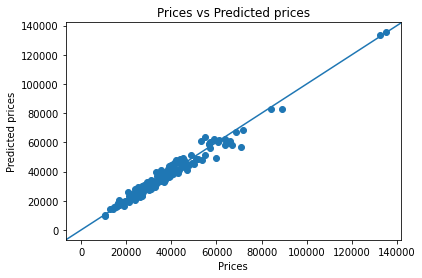

In [30]:
plt.scatter(y_test, y_pred_HMC)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.axline((0, 0), slope=1)
plt.show()

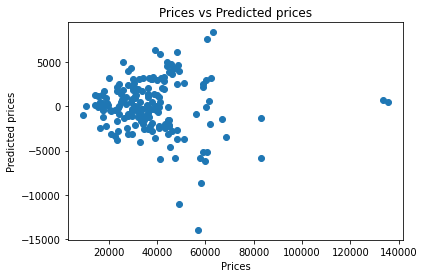

In [31]:
plt.scatter(y_pred_HMC, y_pred_HMC-y_test)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

C:\Users\zoula\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


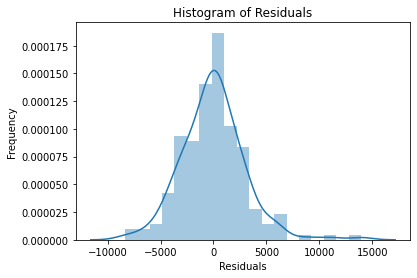

In [32]:
sns.distplot(y_test-y_pred_HMC)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# RMSE

In [33]:
diff=np.subtract(y_test, y_pred_HMC)
square=np.square(diff)
MSE=square.mean()
RMSE=np.sqrt(MSE)
print("Root Mean Square Error:", RMSE)

Root Mean Square Error: 3015.659023230944


# R^2

In [34]:
def performance_metric(y_true, y_predict):
    """ Calcule et renvoie le score de performance entre 
        valeurs vraies et prédites en fonction de la métrique choisie. """
    
    # Calculer le score de performance entre 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Rendre le score
    return score

In [36]:
R_2 = performance_metric(y_test, y_pred_HMC)
print("R-Squared:", R_2)

R-Squared: 0.9697982666601457
